In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '../modules/')
import model
import utils

In [6]:
# Parameters of the dynamics
NDyn = 50

Nsteps = 10000
dt = 1e-2
cvec = np.ones(NDyn)*0.5
evec = np.ones(NDyn)*1

Time = np.arange(0, Nsteps*dt, dt)

rho_0 = np.zeros(NDyn)
rho_0[0] = 0.001

f_dyn = 0.5
xi_dyn = 3.5

# Parameters for metapop
NLambda = 200

f_array_metapop = np.geomspace(0.001, 1000, 100)
xi_array_metapop = np.linspace(0.5, 10, 5)
idx_xi_Lambda = -1

# parameters for plotting the kernel
f_kernel = [0.1, 1, 10]
xi_kernel = 1

# Ring

### Effective kernel

In [ ]:
net_RI = nx.cycle_graph(NLambda)

LambdaMax_RI = model.find_all_metapop(f_array_metapop, xi_array_metapop, net_RI, undirected = True,
                                      guaranteed_connected = True)

kernels_RI = []
for f in f_kernel:
    kernels_RI.append(model.find_effective_kernel(f, xi_kernel, net_RI))

avg_K_RI = []
std_K_RI = []
dist_K_RI = []

min_K_RI = []
max_K_RI = []

for K in kernels_RI:
    avg_K_RI_temp, std_K_RI_temp, dist_K_RI_temp, distances_RI = model.dist_dependence(net_RI, K)
    avg_K_RI.append(avg_K_RI_temp)
    std_K_RI.append(std_K_RI_temp)
    dist_K_RI.append(dist_K_RI_temp)
    min_K_RI.append(np.array([np.min(dist) for dist in dist_K_RI_temp]))
    max_K_RI.append(np.array([np.max(dist) for dist in dist_K_RI_temp]))

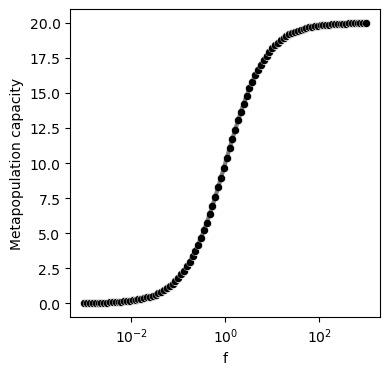

In [17]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(4,4))

ax.scatter(f_array_metapop, LambdaMax_RI[idx_xi_Lambda], color = 'black', s = 35, ec = 'w', lw = 0.5)
ax.plot(f_array_metapop, LambdaMax_RI[idx_xi_Lambda], color = 'black', lw = 3, alpha = 0.5)

ax.set_xscale('log')
ax.set_xlabel('f')
ax.set_ylabel(r'Metapopulation capacity')
plt.show()

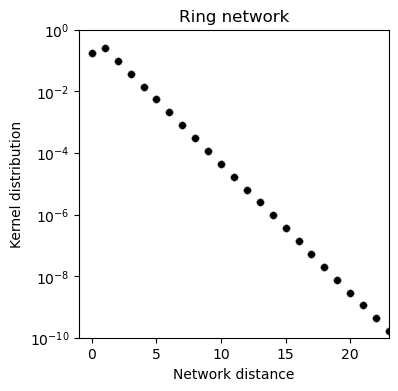

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for idx, dist in enumerate(distances_RI):
    ax.scatter([dist]*len(dist_K_RI[1][idx]), dist_K_RI[1][idx], color = 'k', s = 30, ec = 'white', lw = 0.25)
ax.set_yscale('log')
ax.set_xlim(-1,23)
ax.set_ylim(1e-10, 1e0)
ax.set_xlabel(r'Network distance')
ax.set_ylabel(r'Kernel distribution')
ax.set_title('Ring network')

plt.show()

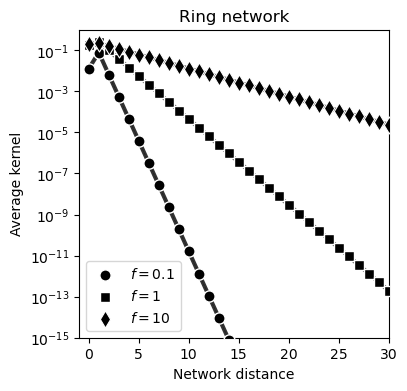

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
markers = ['o', 's', 'd']
s = [65, 55, 75]
lw_ec = [1, 1., 0.8]
for i in range(3):
    ax = utils.plot_kernel_distances(distances_RI, avg_K_RI[i], min_K_RI[i], max_K_RI[i], s = s[i], lw_ec = lw_ec[i],
                                     color = 'k', label = f'$f = {f_kernel[i]}$', ax = ax, marker = markers[i])

ax.set_xlim(-1,30)
ax.set_ylim(1e-15, 1e0)
ax.set_title('Ring network')
ax.legend(fontsize = 10)
plt.show()

### Dynamics

In [23]:
net_RI = nx.cycle_graph(NDyn)

In [ ]:
kernel_RI = model.find_effective_kernel(f_dyn, xi_dyn, net_RI)

In [25]:
rho_RI = model.simulate(NDyn, Nsteps, dt, kernel_RI, cvec, evec, rho0 = rho_0)

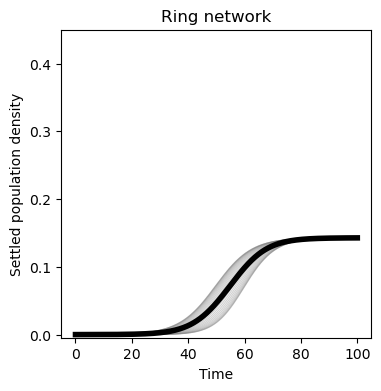

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Time, rho_RI.mean(axis = 1), color = 'k', lw = 4, zorder = np.inf)
ax.plot(Time, rho_RI, color = 'gray', lw = 0.75, alpha = 0.2)
ax.set_xlabel('Time')
ax.set_ylabel('Settled population density')
ax.set_title('Ring network')
ax.set_ylim(-0.0046, 0.45)
plt.show()

# Small world

### Network

In [ ]:
p_SW = 0.3
net_SW = nx.connected_watts_strogatz_graph(NLambda, 2, p_SW)

LambdaMax_SW = model.find_all_metapop(f_array_metapop, xi_array_metapop, net_SW, undirected = True,
                                      guaranteed_connected = True)

kernels_SW = []
for f in f_kernel:
    kernels_SW.append(model.find_effective_kernel(f, xi_kernel, net_SW))

avg_K_SW = []
std_K_SW = []
dist_K_SW = []

min_K_SW = []
max_K_SW = []

for K in kernels_SW:
    avg_K_SW_temp, std_K_SW_temp, dist_K_SW_temp, distances_SW = model.dist_dependence(net_SW, K)
    avg_K_SW.append(avg_K_SW_temp)
    std_K_SW.append(std_K_SW_temp)
    dist_K_SW.append(dist_K_SW_temp)
    min_K_SW.append(np.array([np.min(dist) for dist in dist_K_SW_temp]))
    max_K_SW.append(np.array([np.max(dist) for dist in dist_K_SW_temp]))

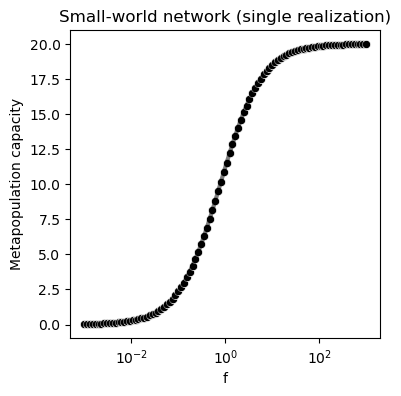

In [48]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(4,4))

ax.scatter(f_array_metapop, LambdaMax_SW[idx_xi_Lambda], color = 'black', s = 35, ec = 'w', lw = 0.5)
ax.plot(f_array_metapop, LambdaMax_SW[idx_xi_Lambda], color = 'black', lw = 3, alpha = 0.5)

ax.set_xscale('log')
ax.set_xlabel('f')
ax.set_ylabel(r'Metapopulation capacity')
ax.set_title('Small-world network (single realization)')
plt.show()

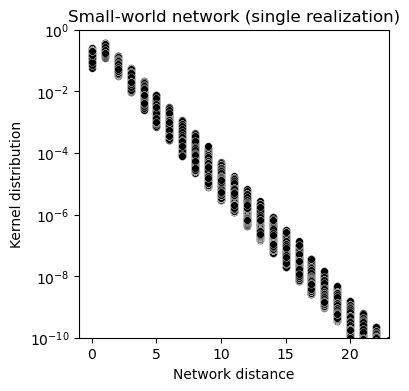

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for idx, dist in enumerate(distances_SW):
    ax.scatter([dist]*len(dist_K_SW[1][idx]), dist_K_SW[1][idx], color = 'k', s = 30, ec = 'white', lw = 0.25)
ax.set_yscale('log')
ax.set_xlim(-1,23)
ax.set_ylim(1e-10, 1e0)
ax.set_xlabel(r'Network distance')
ax.set_ylabel(r'Kernel distribution')
ax.set_title('Small-world network (single realization)')

plt.show()

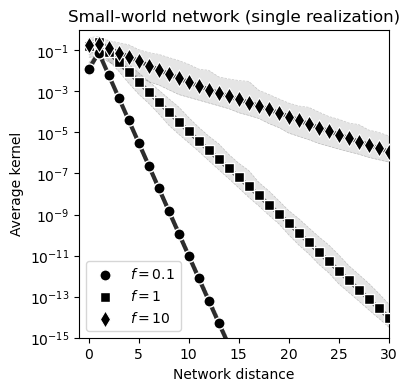

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
markers = ['o', 's', 'd']
s = [65, 55, 75]
lw_ec = [1, 1., 0.8]
for i in range(3):
    ax = utils.plot_kernel_distances(distances_SW, avg_K_SW[i], min_K_SW[i], max_K_SW[i], s = s[i], lw_ec = lw_ec[i],
                                     color = 'k', label = f'$f = {f_kernel[i]}$', ax = ax, marker = markers[i])

ax.set_xlim(-1,30)
ax.set_ylim(1e-15, 1e0)
ax.set_title('Small-world network (single realization)')
ax.legend(fontsize = 10)
plt.show()

### Dynamics

In [49]:
p_SW = 0.3
net_SW = nx.connected_watts_strogatz_graph(NDyn, 2, p_SW, seed = 42)

In [ ]:
kernel_SW = model.find_effective_kernel(f_dyn, xi_dyn, net_SW)

In [51]:
rho_SW = model.simulate(NDyn, Nsteps, dt, kernel_SW, cvec, evec, rho0 = rho_0)

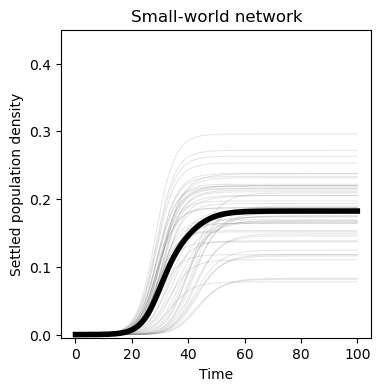

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Time, rho_SW.mean(axis = 1), color = 'k', lw = 4, zorder = np.inf)
ax.plot(Time, rho_SW, color = 'gray', lw = 0.75, alpha = 0.2)
ax.set_xlabel('Time')
ax.set_ylabel('Settled population density')
ax.set_title('Small-world network')
ax.set_ylim(-0.0046, 0.45)
plt.show()

# Barabasi-Albert

### Network

In [ ]:
net_BA = nx.barabasi_albert_graph(NLambda, 2)

LambdaMax_BA = model.find_all_metapop(f_array_metapop, xi_array_metapop, net_BA, undirected = True,
                                      guaranteed_connected = True)

kernels_BA = []
for f in f_kernel:
    kernels_BA.append(model.find_effective_kernel(f, xi_kernel, net_BA))

avg_K_BA = []
std_K_BA = []
dist_K_BA = []

min_K_BA = []
max_K_BA = []

for K in kernels_BA:
    avg_K_BA_temp, std_K_BA_temp, dist_K_BA_temp, distances_BA = model.dist_dependence(net_BA, K)
    avg_K_BA.append(avg_K_BA_temp)
    std_K_BA.append(std_K_BA_temp)
    dist_K_BA.append(dist_K_BA_temp)
    min_K_BA.append(np.array([np.min(dist) for dist in dist_K_BA_temp]))
    max_K_BA.append(np.array([np.max(dist) for dist in dist_K_BA_temp]))

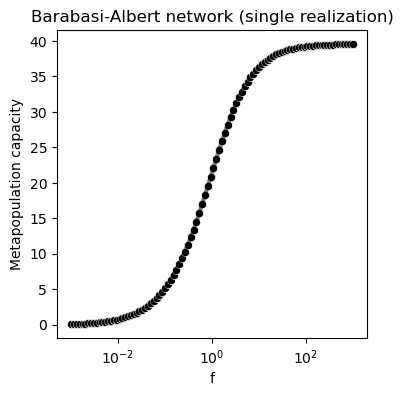

In [56]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(4,4))

ax.scatter(f_array_metapop, LambdaMax_BA[idx_xi_Lambda], color = 'black', s = 35, ec = 'w', lw = 0.5)
ax.plot(f_array_metapop, LambdaMax_BA[idx_xi_Lambda], color = 'black', lw = 3, alpha = 0.5)

ax.set_xscale('log')
ax.set_xlabel('f')
ax.set_ylabel(r'Metapopulation capacity')
ax.set_title('Barabasi-Albert network (single realization)')
plt.show()

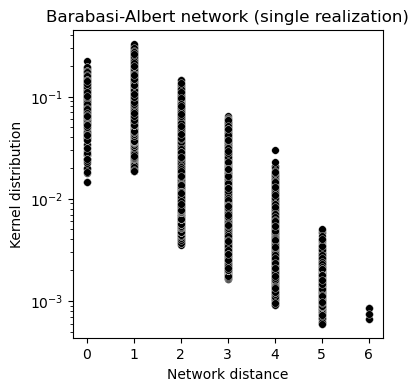

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for idx, dist in enumerate(distances_BA):
    ax.scatter([dist]*len(dist_K_BA[1][idx]), dist_K_BA[1][idx], color = 'k', s = 30, ec = 'white', lw = 0.25)
ax.set_yscale('log')
ax.set_xlabel(r'Network distance')
ax.set_ylabel(r'Kernel distribution')
ax.set_title('Barabasi-Albert network (single realization)')

plt.show()

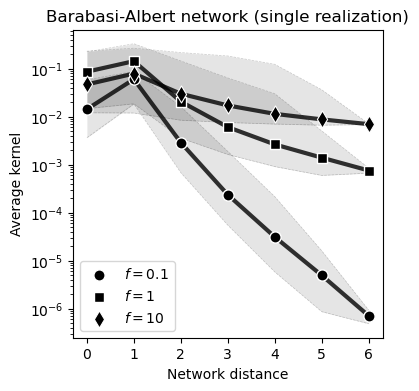

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
markers = ['o', 's', 'd']
s = [65, 55, 75]
lw_ec = [1, 1., 0.8]
for i in range(3):
    ax = utils.plot_kernel_distances(distances_BA, avg_K_BA[i], min_K_BA[i], max_K_BA[i], s = s[i], lw_ec = lw_ec[i],
                                     color = 'k', label = f'$f = {f_kernel[i]}$', ax = ax, marker = markers[i])

ax.set_title('Barabasi-Albert network (single realization)')
ax.legend(fontsize = 10)
plt.show()

### Dynamics

In [63]:
net_BA = nx.barabasi_albert_graph(NDyn, 1)
print('Average degree: ', utils.get_average_degree(net_BA))

Average degree:  1.96


In [ ]:
kernel_BA = model.find_effective_kernel(f_dyn, xi_dyn, net_BA)

In [65]:
rho_BA = model.simulate(NDyn, Nsteps, dt, kernel_BA, cvec, evec, rho0 = rho_0)

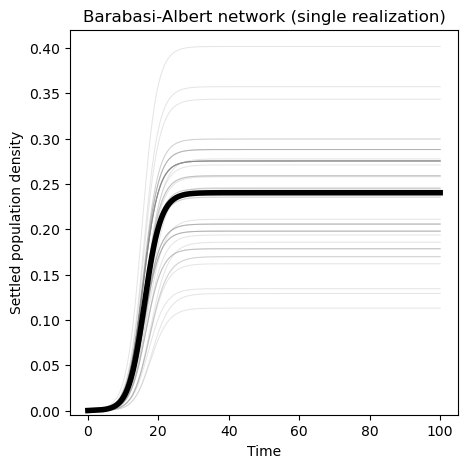

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(Time, rho_BA.mean(axis = 1), color = 'k', lw = 4, zorder = np.inf)
ax.plot(Time, rho_BA, color = 'gray', lw = 0.75, alpha = 0.2)
ax.set_xlabel('Time')
ax.set_ylabel('Settled population density')
ax.set_title('Barabasi-Albert network (single realization)')
ax.set_ylim(-0.0046, 0.42)
plt.show()

# Comparison

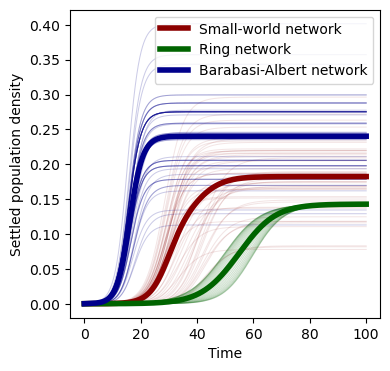

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot(Time, rho_SW.mean(axis = 1), color = 'darkred', lw = 4, zorder = np.inf, label = 'Small-world network')
ax.plot(Time, rho_SW, color = 'darkred', lw = 0.75, alpha = 0.1)

ax.plot(Time, rho_RI.mean(axis = 1), color = 'darkgreen', lw = 4, zorder = np.inf, label = 'Ring network')
ax.plot(Time, rho_RI, color = 'darkgreen', lw = 0.75, alpha = 0.1)

ax.plot(Time, rho_BA.mean(axis = 1), color = 'darkblue', lw = 4, zorder = np.inf, label = 'Barabasi-Albert network')
ax.plot(Time, rho_BA, color = 'darkblue', lw = 0.75, alpha = 0.2)

ax.set_xlabel('Time')
ax.set_ylabel('Settled population density')
ax.legend(loc = 'upper right', fontsize = 10)
plt.show()

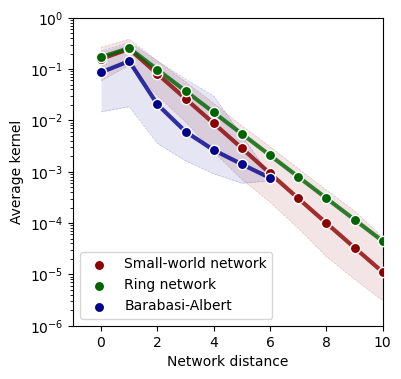

In [78]:
idx = 1
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = utils.plot_kernel_distances(distances_SW, avg_K_SW[idx], min_K_SW[idx], max_K_SW[idx], color = 'darkred', label = 'Small-world network', ax = ax)
ax = utils.plot_kernel_distances(distances_RI, avg_K_RI[idx], min_K_RI[idx], max_K_RI[idx], color = 'darkgreen', label = 'Ring network', ax = ax)
ax = utils.plot_kernel_distances(distances_BA, avg_K_BA[idx], min_K_BA[idx], max_K_BA[idx], color = 'darkblue', label = 'Barabasi-Albert', ax = ax)

ax.set_xlim(-1,10)
ax.set_ylim(1e-6, 1e0)
ax.legend()

plt.show()

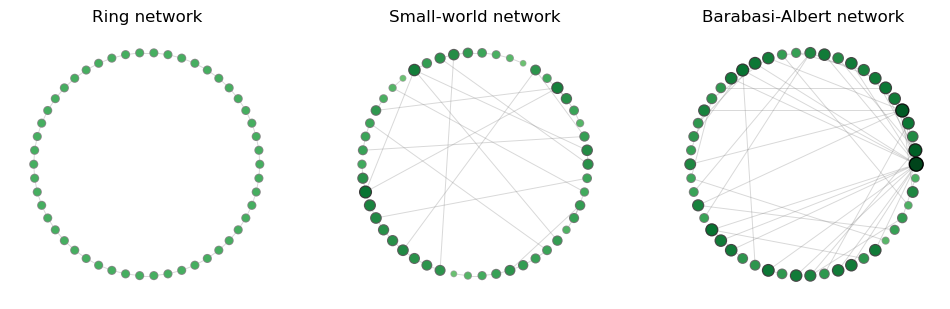

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))
titles_list = ['Ring network', 'Small-world network', 'Barabasi-Albert network']
stat_population = [rho_RI[-1], rho_SW[-1], rho_BA[-1]]

vmax = np.max(stat_population)

pos = [nx.circular_layout(net_RI), nx.circular_layout(net_SW), nx.circular_layout(net_BA)]
for i, net in enumerate([net_RI, net_SW, net_BA]):
    ax[i].set_title(titles_list[i])
    nx.draw_networkx_nodes(net, pos = pos[i], node_size=stat_population[i]*300,
                           node_color=stat_population[i], cmap = utils.truncate_colormap(plt.cm.Greys, 0.3, 1),
                           alpha=1, linewidths=0, edgecolors='k', ax=ax[i], vmin = 0, vmax = vmax)

    nx.draw_networkx_nodes(net, pos = pos[i], node_size=stat_population[i]*200,
                           node_color=stat_population[i], cmap = utils.truncate_colormap(plt.cm.Greens, 0.1, 1), alpha=1,
                           linewidths=0., edgecolors='k', ax=ax[i], vmin = -0.2, vmax = vmax)
                           
    nx.draw_networkx_edges(net, pos = pos[i], width=0.7, alpha=0.3, edge_color='gray', ax=ax[i])

    ax[i].axis('off')

plt.show()

# Erdos-Renyi network

In [84]:
N = 100

f = 1
xi = 1

Nsteps = 5000
dt = 5e-3
cvec = np.ones(N)*0.25
evec = np.ones(N)*1

Time = np.arange(0, Nsteps*dt, dt)

rho_0 = np.zeros(N)
rho_0[0] = 0.1

np.mean(evec/cvec)

nets_single = [utils.generate_connected_ER(N, p) for p in [0.1, 0.15, 0.2]]
K_ER_single = [model.find_effective_kernel(f, xi, net) for net in nets_single]
rho_ER_single = [model.simulate(N, Nsteps, dt, K, cvec, evec, rho0 = rho_0)[-1] for K in K_ER_single]

pos = nx.spring_layout(nets_single[0])

/mnt/DAA0C4FEA0C4E1DD/Users/gnico/OneDrive - Università degli Studi di Padova/PhD/projects/microscopic_hanski_model/public_repo/MicroscopicMetaPop/example_notebooks/../modules/model.py:112: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(network).toarray().astype(float)


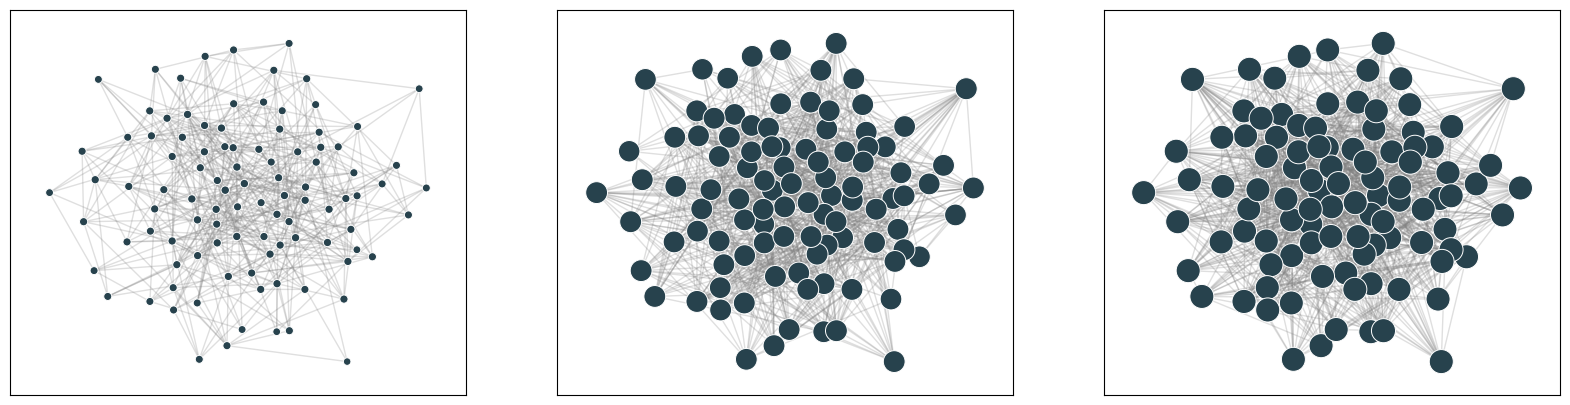

In [86]:
fig, ax = plt.subplots(1, len(nets_single), figsize=(20, 5))

for idx, net in enumerate(nets_single):
    nx.draw_networkx_edges(net, pos = pos, ax=ax[idx], alpha=0.25, width=1, edge_color='gray')
    nx.draw_networkx_nodes(net, pos = pos, node_size = rho_ER_single[idx]*500,
                           node_color = '#27424D', alpha=1, linewidths=0.7, edgecolors='w', ax=ax[idx])
plt.show()

In [87]:
p_array = np.linspace(0.025, 1, 50)
Nrep = 10

nets_list = [[utils.generate_connected_ER(N, p) for _ in range(Nrep)] for p in p_array]
K_ER_list = [[model.find_effective_kernel(f, xi, net) for net in nets] for nets in nets_list]

In [88]:
rho_ER_list = [np.mean([model.simulate(N, Nsteps, dt, K, cvec, evec, rho0 = rho_0)[-1].mean() for K in Klist]) for Klist in K_ER_list]

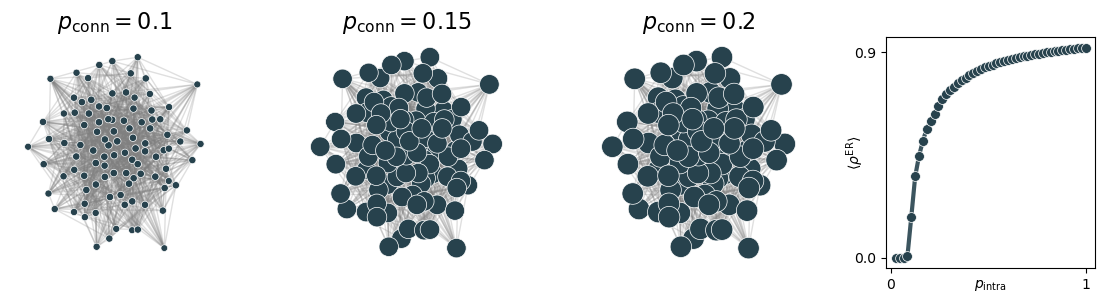

In [94]:
fig, axs = plt.subplot_mosaic([["ER1", "ER2", "ER3", "ER_all"]], figsize=(14, 3))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3)

p_single = [0.1, 0.15, 0.2]

for idx, ax in enumerate([axs["ER1"], axs["ER2"], axs["ER3"]]):
    ax.set_title(r'$p_\mathrm{conn} = ' + str(np.round(p_single[idx], 2)) + '$', fontsize = 16)
    nx.draw_networkx_edges(net, pos = pos, ax=ax, alpha=0.25, width=1, edge_color='gray')
    nx.draw_networkx_nodes(net, pos = pos, node_size = rho_ER_single[idx]*400,
                           node_color = '#27424D', alpha=1, linewidths=0.5, edgecolors='w', ax=ax)
    ax.axis('off')

utils.plot_with_lines(p_array, rho_ER_list, color = '#27424D', lw = 3, s = 50, ax = axs["ER_all"], label = None, lw_ec = 0.5)
axs["ER_all"].set_xlabel(r'$p_\mathrm{intra}$', labelpad = -10)
axs["ER_all"].set_ylabel(r'$\langle \rho^\mathrm{ER} \rangle$', labelpad = -8)
axs["ER_all"].set_xticks([0, 1])
axs["ER_all"].set_yticks([0, 0.9])

plt.show()